# Sets

In [25]:
{1,2,3}

{1, 2, 3}

In [26]:
{1,3,2,3,3}

{1, 2, 3}

In [29]:
my_set = {"a", 2, (1,2)}

In [30]:
my_set.add("a")

In [31]:
my_set

{2, 'a', (1, 2)}

# Objects

In [1]:
class MyClass(object):
    pass

In [4]:
m = MyClass()
m

<__main__.MyClass instance at 0x1046bc248>

In [5]:
m.name = 'Kirk'

In [6]:
m.first_name = 'James T.'

In [9]:
print ', '.join((m.name, m.first_name))

Kirk, James T.


In [10]:
class MyClass(object):
    def __init__(self, name, first_name):
        self.name = name
        self.first_name = first_name

In [12]:
m = MyClass('Kirk', 'James T.')
print ', '.join((m.name, m.first_name))

Kirk, James T.


In [7]:
class MyClass(object):
    var = 42

In [8]:
a = MyClass()
a.var

42

In [9]:
a.var = 43
b = MyClass()
b.var, a.var

(42, 43)

In [10]:
MyClass.var = 5

In [11]:
c = MyClass()
print a.var, b.var, c.var

43 5 5


## Methods

In [13]:
class MyClass(object):
    def __init__(self, name, first_name):
        self.name = name
        self.first_name = first_name
    def fullname(self):
        return ', '.join((self.name, self.first_name))

In [14]:
MyClass('Kirk', 'James T.').fullname()

'Kirk, James T.'

# Why classes?

In [15]:
class IncrementalMean(object):
    def __init__(self, x):
        self.x = x
        self.n = 1
    def add(self, x):
        self.x += x
        self.n += 1
    def mean(self):
        return float(self.x) / self.n

In [16]:
m = IncrementalMean(1)
m.add(2)
m.add(42)
m.mean()

15.0

# Inheritance

In [25]:
class DoIncremental(object):
    def __init__(self, start):
        self.current = start
    def process(self, x):
        self.current = self.do_increment(self.current, x)
        print self.current
    def do_increment(self, current, x):
        return 0

In [26]:
x = DoIncremental(2)

In [27]:
x.process(1), x.process(2)

0
0


(None, None)

In [30]:
class AddIncremental(DoIncremental):
    def do_increment(self, current, x):
        return current+x

In [31]:
x = AddIncremental(0)

In [32]:
x.process(2), x.process(5)

2
7


(None, None)

# Static methods and classmethods

In [33]:
from math import sin, cos, pi, sqrt
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    @classmethod
    def from_polar(cls, r, phi):
        return cls(r * cos(phi),
                   r * sin(phi))
    @staticmethod
    def r(p):
        return sqrt(p.x**2 + p.y**2)
Point.from_polar(1, pi)

In [34]:
Point.r(Point.from_polar(1.5, pi/2))

1.5

## Special methods

In [7]:
class PointV2(Point):
    def __str__(self):
        return "Point, x = {0.x}, y = {0.y}".format(self)

In [8]:
print PointV2.from_polar(1, pi/2)

Point, x = 6.12323399574e-17, y = 1.0


## Inheritance (and more special methods)

In [27]:
class PointWithAccess(Point):
    def __init__(self, x, y):
        super(PointWithAccess, self).__init__(x, y)
    def __getitem__(self, i):
        if i == 0:
            return self.x
        elif i == 1:
            return self.y
        else:
            raise KeyError
    def __iter__(self):
        yield self.x
        yield self.y

In [28]:
p = PointWithAccess(1, 2)
print p

Point, x = 1, y = 2


In [29]:
p[0], p[1]

(1, 2)

In [30]:
[i for i in p]

[1, 2]

# Generators

In [22]:
def get_messages():
    messages = {'One message.', 'Another message.'}
    while messages:
        yield messages.pop()

In [23]:
get_messages()

<generator object get_messages at 0x103e856e0>

In [24]:
[i for i in get_messages()]

['One message.', 'Another message.']

# Decorators

In [39]:
def square_result(fn):
    def square_inner(x):
        return fn(x)**2
    return square_inner

In [40]:
@square_result
def square(x):
    return x

In [41]:
square(2)

4

In [9]:
the_cache = {}
def cache(name):
    the_cache[name] = {}
    def cache_fn(fn):
        def from_cache_or_call(*args):
            return the_cache[name].setdefault(args, fn(*args))
        return from_cache_or_call
    return cache_fn

In [10]:
@cache('cache_name')
def expensive(x, y):
    # do some exensive operation
    return x**y

In [11]:
expensive(128, 4)

268435456

In [12]:
the_cache

{'cache_name': {(128, 4): 268435456}}

In [13]:
the_cache['cache_name'][(128, 4)] -= 1

In [14]:
expensive(128, 4)

268435455

# Scipy / Numpy

**Numpy** provides:

- An `array` class.
- Random sampling.
- Legacy stuff.

**Scipy** provides:

- Interpolation.
- Optimizaiton.
- Numerical integration.
- Fourier transformaions.
- Signal processing.
- Linear algebra.

In [4]:
import numpy as np
import scipy as sp

In [4]:
np.array(range(10), dtype=np.int16)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

In [5]:
np.array(range(10), dtype=np.float32)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.], dtype=float32)

In [6]:
np.arange(0, 10, .5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [8]:
np.array(range(10)) ** np.array(range(10))

array([        1,         1,         4,        27,       256,      3125,
           46656,    823543,  16777216, 387420489])

## Why arrays?

In [22]:
my_array = np.random.standard_normal(1000)
%timeit sum(my_array**2)

10000 loops, best of 3: 126 µs per loop


In [23]:
my_list = list(my_array)
%timeit sum([i**2 for i in my_array])

1000 loops, best of 3: 469 µs per loop


In [28]:
y = np.random.standard_normal(10)

In [29]:
x = np.arange(10)

In [30]:
x,y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0.30534528, -0.13735209, -0.76739274,  0.54162726, -2.39361375,
         0.3224624 , -1.77004347, -1.73053663,  0.27928154,  2.02906537]))

In [35]:
%matplotlib inline

In [36]:
import matplotlib.pylab as plt

# Interpolation

## Splines

A spline $S$ is a piecewise polynomial function on an interval [a, b], i.e. there exists an $n$ and $x_i \in [a,b]$ with $a = x_0 < x_2 < \ldots < x_n = b$, such that

$\left. S\right|_{[x_{i-1}, x_i)} = P_i, \quad i = 1,\ldots, n$

with $P_i$ polynomial and $P_i(x_i) = P_{i+1}(x_i)$.

In [32]:
from scipy.interpolate import interp1d

In [33]:
S = interp1d(x,y,kind='cubic')

In [39]:
S(x)

array([ 0.30534528, -0.13735209, -0.76739274,  0.54162726, -2.39361375,
        0.3224624 , -1.77004347, -1.73053663,  0.27928154,  2.02906537])

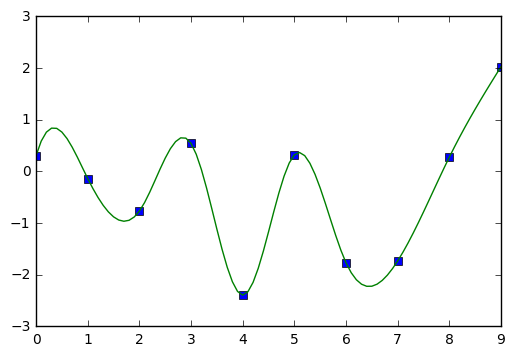

In [51]:
plt.plot(x, y, 's', np.arange(0,9.1,.1), S(np.arange(0,9.1,.1)), "-")

http://www.aavso.org/data-download

# Intergration

We now numerically approximate

$$\int_2^5 S(x) {\rm d}x\,.$$


In [53]:
from scipy.integrate import quad

In [54]:
quad(S, 2, 5)

(-2.0428122646329725, 2.2679772111821845e-15)

# Optimization

## Least-square fitting

Let $f_\theta: \mathbb{R} \rightarrow \mathbb{R}$, $\theta \in \mathbb{R}^k$ be a family of functions, e.g.

$$f_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2\,.$$

Let $x_i, y_i, i = 1,\ldots,n$ be observations of some kind, e.g. temperatures $y$ measuread at times $x$.

Our **objective** is to find

$$\theta^* = \underset{\theta}{\rm argmin} \sum_i \left(y_i - f_\theta(x_i)\right)^2\,.$$

In [124]:
import scipy.optimize

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [125]:
boston = np.recfromtxt('data/housing.tsv', names=True)

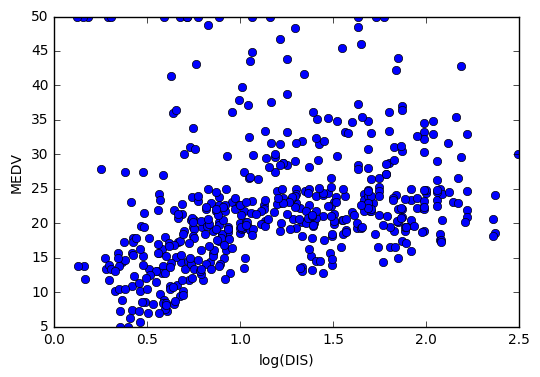

In [126]:
plt.plot(np.log(boston.DIS), boston.MEDV, linestyle='', marker='o')
plt.xlabel("log(DIS)")
plt.ylabel("MEDV")

In [127]:
h = lambda theta, x: theta[0] + x*theta[1] + x*x*theta[2]
errfn = lambda theta: sum((boston.MEDV - h(theta, np.log(boston.DIS)))**2)
params = scipy.optimize.minimize(errfn, [1,1,1])

In [128]:
params

      fun: 38553.02988515905
 hess_inv: array([[ 0.00163412, -0.00171075,  0.00081706],
       [-0.00171075,  0.00331463, -0.00085538],
       [ 0.00081706, -0.00085538,  0.00040853]])
      jac: array([ 0.        ,  0.00097656,  0.00292969])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 96
      nit: 10
     njev: 19
   status: 2
  success: False
        x: array([ 12.36506723,  13.55322896,  -3.4865396 ])

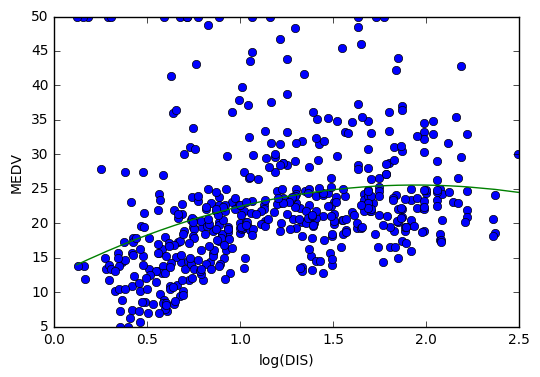

In [129]:
x = np.log(boston.DIS)
plt.plot(x, boston.MEDV, linestyle='', marker='o')
plt.plot(sorted(x), h(params.x, np.array(sorted(x))))
plt.xlabel("log(DIS)")
plt.ylabel("MEDV")

# Fourier transform

$$y_k = \sum_j e^{-2 \pi i \frac {kj} N} x_j$$

Heart series data: http://ecg.mit.edu/time-series/


In [55]:
heart_1 = np.genfromtxt('data/hr_series_1.txt')
heart_2 = np.genfromtxt('data/hr_series_2.txt')

In [58]:
from scipy.fftpack import fft

In [121]:
y_1, y_2 = [abs(fft(i)[1:200])**2 for i in (heart_1, heart_2)]

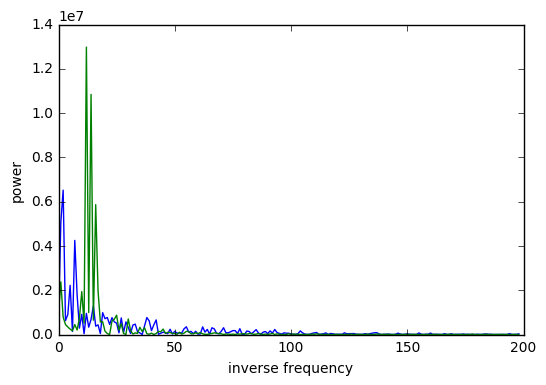

In [123]:
plt.plot(y_1)
plt.plot(y_2)
plt.xlabel("inverse frequency")
plt.ylabel("power")